In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chanm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chanm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\chanm\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [17]:
with open("../../dataset/merge.txt", "r") as file:
    data = file.readlines()

# Create a list to store the data
rows = []

# Process each line in the dataset
for line in data:
    # Split the line into sentiment and content
    content, sentiment = line.strip().split(";")
    
    # Append the data to the list
    rows.append({"sentiment": sentiment, "content": content})

# Create a DataFrame from the list
data = pd.DataFrame(rows)

data.to_csv("../../dataset/training.csv", index=False)

In [18]:
data.shape

(20000, 2)

In [19]:
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 sentiment    0
content      0
dtype: int64


In [20]:
#print the number of duplicated values 
data.duplicated().sum()

1

In [21]:
index = data[data.duplicated() == True].index
data.drop(index, axis = 0, inplace = True)
data.reset_index(inplace=True, drop = True)

In [22]:
data[data['content'].duplicated() == True]

,sentiment,content
2112,love,i feel like some of you have pains and you can...
3372,surprise,i loved the feeling i got during an amazing sl...
3793,joy,i feel cared for and accepted
5745,fear,i feel so weird and scattered with all wonders...
7067,joy,i feel on the verge of tears from weariness i ...
8034,fear,i have not conducted a survey but it is quite ...
8133,love,i still feel a craving for sweet food
8563,anger,i tend to stop breathing when i m feeling stre...
9623,sadness,i was intensely conscious of how much cash i h...
9645,love,i feel the need to pimp this since raini my be...


In [23]:
index = data[data['content'].duplicated() == True].index
data.drop(index, axis = 0, inplace = True)
data.reset_index(inplace=True, drop = True)

In [24]:
data.duplicated().sum()

0

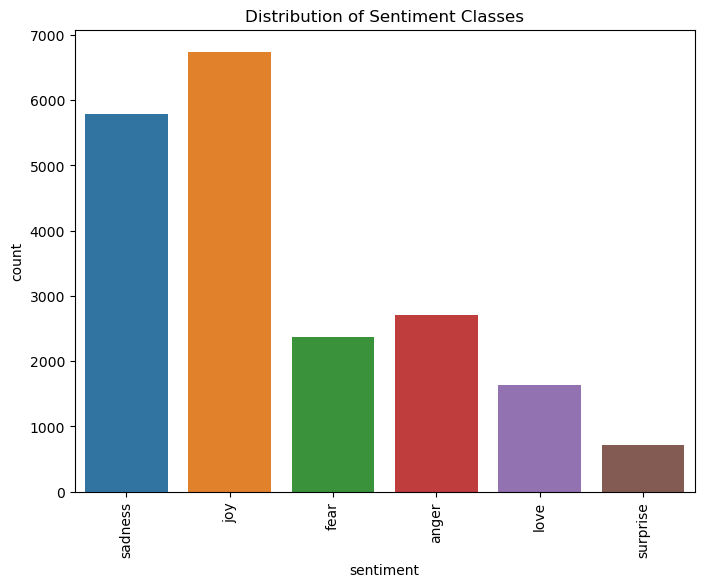

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=data)
plt.title('Distribution of Sentiment Classes')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.show()


In [26]:
stop_words = set(stopwords.words("english"))
lemmatizer= WordNetLemmatizer()

In [27]:
def lemmatization(text):
    lemmatizer= WordNetLemmatizer()
    text = text.split()
    text=[lemmatizer.lemmatize(y) for y in text]
    return " " .join(text)

def remove_stop_words(text):
    text=[i for i in str(text).split() if i not in stop_words]
    return " ".join(text)

def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def lower_case(text):
    text = text.split()
    text=[y.lower() for y in text]
    return " " .join(text)

def Removing_punctuations(text):
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan
            
def normalize_text(df):
    df['content']=df['content'].apply(lower_case)
    df['content']=df['content'].apply(remove_stop_words)
    df['content']=df['content'].apply(Removing_numbers)
    df['content']=df['content'].apply(Removing_punctuations)
    df['content']=df['content'].apply(Removing_urls)
    df['content']=df['content'].apply(lemmatization)
    return df


In [28]:
data = normalize_text(data)

In [29]:
data.head()

,sentiment,content
0,sadness,im feeling rather rotten im ambitious right
1,sadness,im updating blog feel shitty
2,sadness,never make separate ever want feel like ashamed
3,joy,left bouquet red yellow tulip arm feeling slig...
4,sadness,feeling little vain one


In [30]:
output_file_path = "./cleaned_train_data.csv"
data.to_csv(output_file_path, index=False)